In [1]:
# importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree 

In [2]:
# load dataset into dataframe
housing_price_df = pd.read_csv('data/housing_sales_data.zip',compression='zip',  header=0, quotechar='"')

# display first five rows to verify if data loaded properly
housing_price_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# creating dataframe for percentage of missing values for features
missing_value_df =pd.DataFrame((housing_price_df.isnull().sum() / len(housing_price_df))*100)

# renaming the columns
missing_value_df.rename(columns = {0: 'percentage'}, inplace=True)

# filter only the features which are having missing values
missing_value_df = missing_value_df[missing_value_df['percentage']>0]

# display features which are having missing values
missing_value_df

,percentage
LotFrontage,17.739726
Alley,93.767123
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


In [4]:
# create list with features that are missing more than 40% of their values
drop_column_list= missing_value_df[missing_value_df['percentage']>40].index.values.tolist()

# removing them from the missing values dataframe
missing_value_df.drop(index=drop_column_list, inplace=True)

# adding id column to the drop list
drop_column_list.append('Id')

# dropping Id column and  features that are missing more than 40% of their values
housing_price_df.drop(columns=drop_column_list, inplace=True)

# display first five rows
housing_price_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
# Create a method to impute missing values
def num_cat_imputer(column_name,is_numeric):
    if is_numeric:
# replace missing values with median for numerical column        
        housing_price_df[column_name].fillna(housing_price_df[column_name].mean(), inplace=True)
    else:
# replace missing values with mode for categorical column        
        housing_price_df[column_name].fillna(housing_price_df[column_name].mode()[0], inplace=True)



In [6]:
# filling the missing values for numerical and categorical columns
for column_name in missing_value_df.index.values.tolist():    
    num_cat_imputer(column_name, np.issubdtype(housing_price_df[column_name].dtype, np.number))

In [7]:
# creating a list of categorical columns
categorical_column_list=[column_name for column_name in housing_price_df if not np.issubdtype(housing_price_df[column_name].dtype, np.number)]

# Converting categorical columns to dummy variabels using pandas get_dummies method
housing_price_df = pd.get_dummies(housing_price_df,columns = categorical_column_list )
housing_price_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


In [8]:
'''
Using train_test_split from sklearn, split
the dataset into train and test sets. 
SalePrice is the target that needs to be predicted, and
the remaining columns are independent variables.
The parameter test_size = 0.2 allocates 20% of data for training,
and random_state=0  gives the same train and
test sets across different execution
'''
# get independent variables
X = housing_price_df.loc[:,housing_price_df.columns != 'SalePrice']

# get dependent variable
y = housing_price_df.loc[:,housing_price_df.columns == 'SalePrice']


# split the dataset
feature_train, feature_test, target_train, target_test =\
train_test_split(X ,y,test_size = 0.2, random_state = 0 )

In [9]:
# get Ordinary Linear Regression
regression_model = LinearRegression()

# fit the linear model using training dataset
regression_model.fit(feature_train, target_train)

# predict SalePrice values
target_predict_test = regression_model.predict(feature_test)

# Calculate R2 for test sets
r2_value_test = regression_model.score(feature_test, target_test)
print('R2 value of test set: = {:.4f}'.format(r2_value_test))

# calculate root mean square error(RMSE) for test dataset for the fitted ols model
rmse_value_test = mean_squared_error(target_test, target_predict_test, squared = False)
print('RMSE value of test set: = {:.4f}'.format(rmse_value_test))

R2 value of test set: = 0.5562
RMSE value of test set: = 55361.1777


In [10]:
# Scale data before applying PCA
training_features=StandardScaler().fit_transform(feature_train)

# get PCA - preserving 90% of the variance in the data
pca = PCA(n_components=0.90, whiten = True)

# Fit and transform the training features
feature_pca = pca.fit_transform(training_features)

In [11]:
print('Original features:',training_features.shape[1])
print('PCA transfomred features:',feature_pca.shape[1])

Original features: 266
PCA transfomred features: 136


In [12]:
# Scale data before applying PCA
test_features=StandardScaler().fit_transform(feature_test)

# transform test features so that PCA model can read
test_feature_pca = pca.transform(test_features)

# PCA transfomred features
test_feature_pca.shape[1]

136

In [13]:
# fit the linear model using pca transformed data
regression_model.fit(feature_pca, target_train)

# predict SalePrice values  using the pca transformed data
pca_target_predict_test = regression_model.predict(test_feature_pca)

# Calculate R2 for test sets
r2_value_pca_test = regression_model.score(test_feature_pca, target_test)
print('R2 value of PCA test set: = {:.4f}'.format(r2_value_pca_test))

# calculate root mean square error for test dataset for the fitted ols model
rmse_value_pca_test = mean_squared_error(target_test, pca_target_predict_test, squared = False)
print('RMSE value of PCA test set: = {:.4f}'.format(rmse_value_pca_test))

R2 value of PCA test set: = 0.7225
RMSE value of PCA test set: = 43774.1418


In [14]:
# create instance for min-max scalar
min_max_scaler = MinMaxScaler()

# fit and transform the tranining feature
min_max_scaler_features = min_max_scaler.fit_transform(feature_train)

In [15]:
# get VarianceThreshold with threshold of 0.1. It will remove the features which are having variance less than 0.1
thresholder = VarianceThreshold(threshold=.1)

# Finding the min-max scaled features in training set that have a variance above 0.1
feature_high_variance = thresholder.fit_transform(min_max_scaler_features)

In [16]:
# Scale data before applying VarianceThreshold
min_max_scaler_test_features = min_max_scaler.fit_transform(feature_test)

# transform the test features
feature_high_variance_test= thresholder.transform(min_max_scaler_test_features)

In [17]:
# fit the linear model using training dataset
regression_model.fit(feature_high_variance, target_train)

# predict SalePrice values
target_predict_test = regression_model.predict(feature_high_variance_test)

# Calculate R2 for test sets
r2_value_test = regression_model.score(feature_high_variance_test, target_test)
print('R2 value of test set: = {:.4f}'.format(r2_value_test))

# calculate root mean square error for test dataset for the fitted ols model
rmse_value_test = mean_squared_error(target_test, target_predict_test, squared = False)
print('RMSE value of test set: = {:.4f}'.format(rmse_value_test))

R2 value of test set: = 0.6072
RMSE value of test set: = 52083.3857


**Result Summary:**

> The coefficient of determination helps to find how well the regression model fits the observed data values. The higher the value better. The
root mean square error tells us the average distance between the predicted values from the model and the actual values in the dataset. The lower the value better. </br>

**Model 1: Linear regression**</br>
The R2 value of test set: = 0.5562</br>
RMSE value of test set: = $55361.1777</br>

**Model 2: Linear regression with PCA-transformed features**</br>
The R2 value of  test set: = 0.7225</br>
RMSE value of  test set: = $43774.1418</br>

**Model 3: Linear regression with high-variance data**</br>
The R2 value of test set: = 0.6072</br>
RMSE value of test set: = $52083.3857</br>

> From the above result, the RMSE value of the PCA transformed feature is the lowest, and it has a higher R2 value than the other two models. The PCA transformed feature is better among the three models, followed by the high-variance data model.

In [18]:
# load dataset into dataframe
mushrooms_df = pd.read_csv('mushrooms.csv',  header=0, quotechar='"')

# display first five rows to verify if data loaded properly
mushrooms_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [19]:
# Converting categorical columns to dummy variabels using pandas get_dummies method
X = pd.get_dummies(mushrooms_df.loc[:,mushrooms_df.columns != 'class'] )
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [20]:
'''
Using train_test_split from sklearn, split
the dataset into train and test sets. 
class is the target that needs to be predicted, and
the remaining columns are independent variables.
The parameter test_size = 0.3 allocates 30% of data for training,
and random_state=0  gives the same train and
test sets across different execution
'''

# get dependent variable
y = mushrooms_df.loc[:,mushrooms_df.columns == 'class']


# split the dataset
feature_train, feature_test, target_train, target_test =\
train_test_split(X ,y,test_size = 0.3, random_state = 0 )

In [21]:
# create instance for decision tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# fit the training data to the model
decision_tree_classifier.fit(feature_train, target_train)

DecisionTreeClassifier()

Accuracy score: 1.000



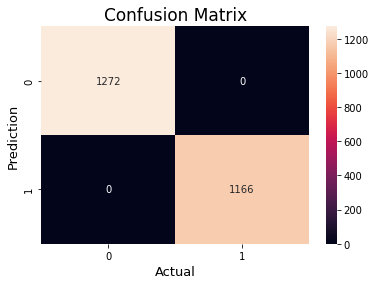

In [22]:
# predict for the test data
y_target_predict = decision_tree_classifier.predict(feature_test)

# find accuracy using accuracy_score from sklearn    
accuracy_score_val = accuracy_score(target_test, y_target_predict)
# print  accuracy score   
print('Accuracy score: %.3f\n' % accuracy_score_val)
    
# Create confusion matrix    
cf_matrix = confusion_matrix(target_test, y_target_predict)
# Visualizing the confusion matrix 
sns.heatmap(cf_matrix,
            annot=True,
            fmt='g',

           )
# Set labels and titles    
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
# display the plot    
plt.show()

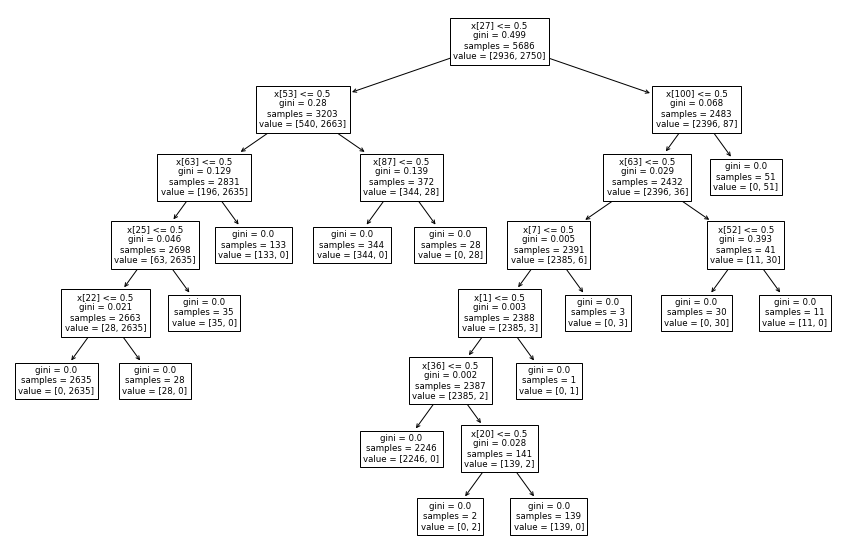

In [23]:
# setting figure size
plt.figure(figsize=(15,10))

# plot decision tree
tree.plot_tree(decision_tree_classifier)

# display the plot  
plt.show()

In [24]:
# create chi2 instance with k value 5
chi2_selector = SelectKBest(chi2, k=5)

# fit and transform the data
features_kbest = chi2_selector.fit_transform(X,y)
features_kbest.shape[1]

5

In [25]:
# get the selected 5 features
best_five_features = X.iloc[:,chi2_selector.get_support(indices=True)]

# display the result
print(best_five_features.columns)

Index(['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')


Accuracy score: 0.939



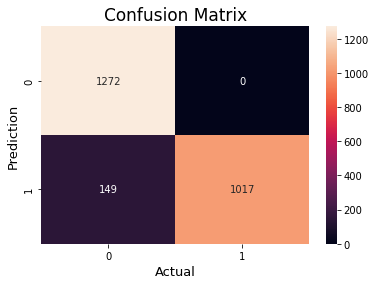

In [26]:
# get train and test features dataframe for the best chi2  selected features
feature_train_five_chi2 = feature_train.loc[:,best_five_features.columns.values]
feature_test_five_chi2 = feature_test.loc[:,best_five_features.columns.values]

# fit the training data to the model
decision_tree_classifier.fit(feature_train_five_chi2, target_train)

# predict for the test data
y_target_predict_chi2 = decision_tree_classifier.predict(feature_test_five_chi2)

# find accuracy using accuracy_score from sklearn    
accuracy_score_val = accuracy_score(target_test, y_target_predict_chi2)
# print  accuracy score   
print('Accuracy score: %.3f\n' % accuracy_score_val)
    
# Create confusion matrix    
cf_matrix = confusion_matrix(target_test, y_target_predict_chi2)
# Visualizing the confusion matrix 
sns.heatmap(cf_matrix,
            annot=True,
            fmt='g',
           )
# Set labels and titles    
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
# display the plot    
plt.show()

**Result Summary:**

> The accuracy score measures the number of correct predictions made by a model with the total number of predictions made. The higher the accuracy score, the better.

**Model1: decision tree**</br>
The accuracy score of model one is 1.0, which means it always predicted the result. Also, the confusion matrix shows false positives, and true negatives are zero.</br>

**Model2: Decision tree with chi2**</br>
The accuracy score of model one is 0.938
, which means it predicted the result 93.8% of the time. Also, the confusion matrix shows few false positives and true negatives.</br>

> The above result shows that the model decision tree without the chi2 selector is better.